Upload the first image (low-frequency).


Saving download.jpeg to download.jpeg
Upload the second image (high-frequency).


Saving download (1).jpeg to download (1).jpeg


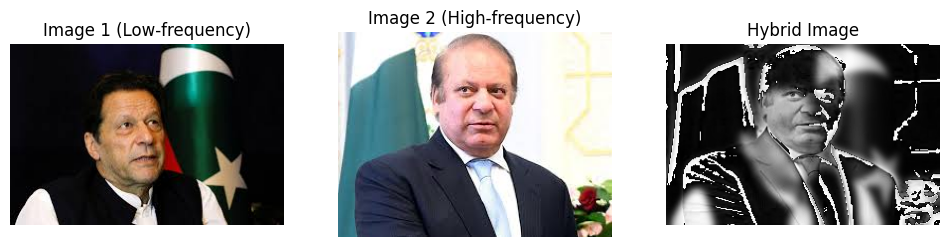

True

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to upload images from user
def upload_image():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]  # Get the uploaded image path
    return cv2.imread(image_path)

# Function to create hybrid image
def create_hybrid_image(image1, image2):
    # Convert images to grayscale for simplicity (optional, can use colored images too)
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Resize the images to be the same size (if necessary)
    image2_gray = cv2.resize(image2_gray, (image1_gray.shape[1], image1_gray.shape[0]))

    # Apply a Gaussian filter to get the low-frequency components of image1
    low_freq = cv2.GaussianBlur(image1_gray, (21, 21), 0)

    # Subtract the low-frequency components from image2 to get the high-frequency components
    high_freq = image2_gray - cv2.GaussianBlur(image2_gray, (21, 21), 0)

    # Combine the low-frequency components of image1 with the high-frequency components of image2
    hybrid_image = low_freq + high_freq

    return hybrid_image

# Upload the two images from the user
print("Upload the first image (low-frequency).")
image1 = upload_image()
print("Upload the second image (high-frequency).")
image2 = upload_image()

# Create the hybrid image
hybrid_image = create_hybrid_image(image1, image2)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 (Low-frequency)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 (High-frequency)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')

plt.show()

# Optionally save the hybrid image
cv2.imwrite('hybrid_image.jpg', hybrid_image)